In [ ]:

#### importing libraries 


import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format("channels_last")
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## importing the training dataset 
### have taken the datasets which is given by sir names as "bikehorse"



path = "/content/drive/MyDrive/bikehorse"
train_datagen = ImageDataGenerator(rescale=1. / 255)
train = train_datagen.flow_from_directory(path, target_size=(227,227), class_mode='categorical')

Found 164 images belonging to 2 classes.


In [ ]:
## dimensions of the first image and its associated output in the first batch.


print("Batch Size for Input Image : ",train[0][0].shape)
print("Batch Size for Output Image : ",train[0][1].shape)
print("Image Size of first image : ",train[0][0][0].shape)
print("Output of first image : ",train[0][1][0].shape)

Batch Size for Input Image :  (32, 227, 227, 3)
Batch Size for Output Image :  (32, 2)
Image Size of first image :  (227, 227, 3)
Output of first image :  (2,)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 1.]')

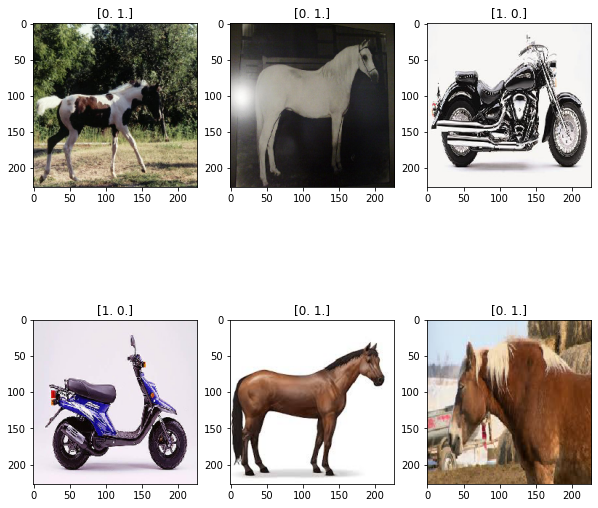

In [ ]:

## checking out  some examples from the dataset


fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(train[0][0][12])
axs[0][0].set_title(train[0][1][12])
axs[0][1].imshow(train[0][0][10])
axs[0][1].set_title(train[0][1][10])
axs[0][2].imshow(train[0][0][5])
axs[0][2].set_title(train[0][1][5])
axs[1][0].imshow(train[0][0][20])
axs[1][0].set_title(train[0][1][20])
axs[1][1].imshow(train[0][0][25])
axs[1][1].set_title(train[0][1][25])
axs[1][2].imshow(train[0][0][3])
axs[1][2].set_title(train[0][1][3])

In [ ]:
## construct  our AlexNet Deep Learning Network:-

def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(2,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

In [ ]:
alex = AlexNet(train[0][0].shape[1:])

In [ ]:
## printing the summary of the ALEXNET model 
alex.summary()

Model: "AlexNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 227, 227, 3)]     0         
                                                                 
 conv0 (Conv2D)              (None, 55, 55, 96)        34944     
                                                                 
 bn0 (BatchNormalization)    (None, 55, 55, 96)        384       
                                                                 
 activation_10 (Activation)  (None, 55, 55, 96)        0         
                                                                 
 max0 (MaxPooling2D)         (None, 27, 27, 96)        0         
                                                                 
 conv1 (Conv2D)              (None, 27, 27, 256)       614656    
                                                                 
 bn1 (BatchNormalization)    (None, 27, 27, 256)       1024

In [ ]:
alex.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
alex.fit_generator(train,epochs=10)   ### we are using here 10 epochs have checked through increasing epochs too

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
6/6 [==============================] - 1s 228ms/step - loss: 0.0209 - accuracy: 0.9939
Epoch 2/10
6/6 [==============================] - 1s 228ms/step - loss: 0.0216 - accuracy: 0.9939
Epoch 3/10
6/6 [==============================] - 1s 189ms/step - loss: 0.0158 - accuracy: 0.9939
Epoch 4/10
6/6 [==============================] - 1s 188ms/step - loss: 0.0330 - accuracy: 0.9878
Epoch 5/10
6/6 [==============================] - 1s 184ms/step - loss: 0.0682 - accuracy: 0.9695
Epoch 6/10
6/6 [==============================] - 1s 202ms/step - loss: 0.0971 - accuracy: 0.9634
Epoch 7/10
6/6 [==============================] - 1s 185ms/step - loss: 0.0505 - accuracy: 0.9756
Epoch 8/10
6/6 [==============================] - 1s 200ms/step - loss: 0.0371 - accuracy: 0.9878
Epoch 9/10
6/6 [==============================] - 1s 187ms/step - loss: 0.0387 - accuracy: 0.9878
Epoch 10/10
6/6 [==============================] - 1s 193ms/step - loss: 0.0376 - accuracy: 0.9817


In [ ]:
# path_test = '/content/drive/MyDrive/test'
# test_datagen = ImageDataGenerator(rescale=1. / 255)
# test = test_datagen.flow_from_directory(path_test, target_size=(227,227), class_mode='categorical')

Found 0 images belonging to 0 classes.


In [ ]:
# preds = alex.evaluate_generator(test)
# print ("Loss = " + str(preds[0]))
# print ("Test Accuracy = " + str(preds[1]))

In [ ]:
## loading the prediction data that is "seg_pred" on which we have to predict :

path_test = "/content/drive/MyDrive/test"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_test, target_size=(227,227), batch_size = 1,class_mode='categorical')

Found 15 images belonging to 1 classes.


In [ ]:
## using predict_generator() function to predict 
predictions = alex.predict_generator(predict)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


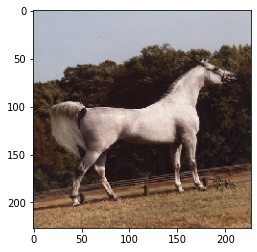

In [ ]:
imshow(predict[4][0][0])

In [ ]:
print(predictions[4])  ### this is giving the probabilities of every class for 4th image 

[5.5275815e-09 1.0000000e+00]


In [ ]:
import os 
def get_category(predicted_output):
    path ="/content/drive/MyDrive/bikehorse"
    return os.listdir(path)[np.argmax('abc')]

In [ ]:
print(get_category(predictions[1]))

Horses


Text(0.5, 1.0, 'Horses')

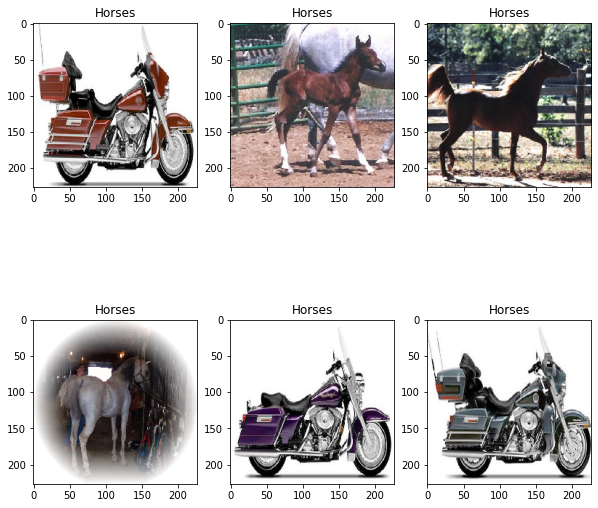

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))
axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[6][0][0])
axs[1][0].set_title(get_category(predictions[6]))
axs[1][1].imshow(predict[7][0][0])
axs[1][1].set_title(get_category(predictions[7]))
axs[1][2].imshow(predict[5][0][0])
axs[1][2].set_title(get_category(predictions[5]))